## Estrategia 2: Red pre-entrenada

#### 1.   **Carga**

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/181.2 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.5
    Uninstalling kaggle-1.7.4.5:
      Successfully uninstalled kaggle-1.7.4.5


In [ ]:
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rickstark","key":"0956e87b3524fef84e1b1362d030eb43"}'}

In [ ]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Ya podemos listar los datasets disponibles en kaggle para su descarga
!kaggle datasets list

ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sadiajavedd/students-academic-performance-dataset               Students_Academic_Performance_Dataset                    8907  2025-10-23 04:16:35.563000           6056        145  1.0              
ayeshaimran123/social-media-and-mental-health-balance           Social Media and Mental Health Balance                   5941  2025-10-26 07:51:53.380000           6356         89  1.0              
ayeshasiddiqa123/cars-pre                                       Car Price Analysis Dataset                              46557  2025-11-06 16:38:07.487000           1969         52  1.0              
shahz

In [ ]:
!kaggle datasets download -d gpiosenka/butterflies-100-image-dataset-classification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/butterflies-100-image-dataset-classification
License(s): unknown
 89% 403M/454M [00:02<00:00, 115MB/s]
100% 454M/454M [00:02<00:00, 176MB/s]


In [ ]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

In [ ]:
# Descomprimimos los datos y los dejamos listos para trabajar
!unzip butterflies-100-image-dataset-classification.zip -d my_dataset

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/111.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/112.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/113.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/114.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/115.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/116.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/117.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/118.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/119.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/120.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/121.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/122.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/123.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/124.jpg  
  inflating: my_dataset/train/MILBERTS TORTOISESHELL/125.

#### 2.   **Inspección** y **Acondicionamiento**

In [ ]:
# importar librerias

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as preprocess_input_xception
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Found 12639 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Clases detectadas: ['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN ARGUS', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH', 'CLEARWING MOTH', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMET MOTH', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'EMPEROR GUM MOTH', 'GARDEN TIGER MOTH', 'GIANT LEOPARD MOTH', 'GLITTERING SAPPHIRE', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GR

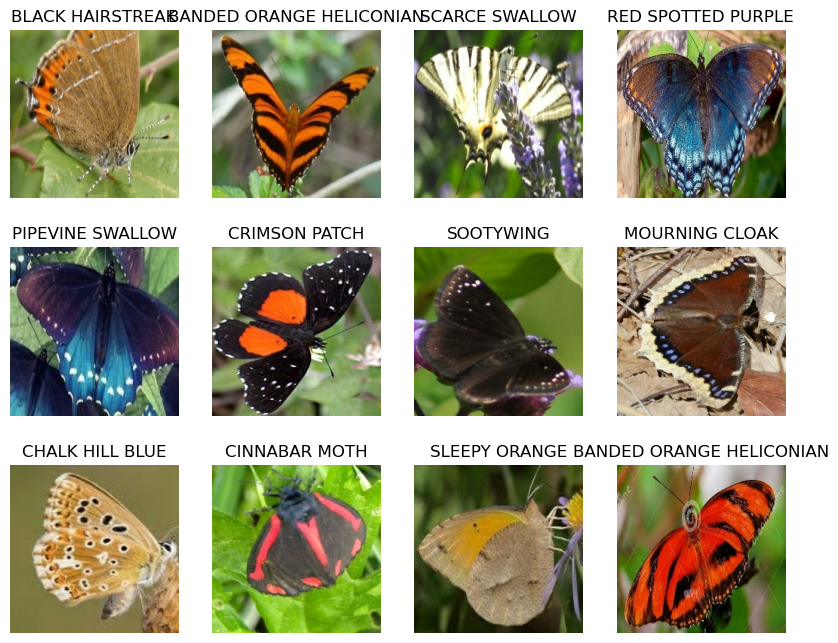

In [ ]:
# Definir Rutas y Parámetros

BASE_DIR = 'my_dataset' # O '/content/my_dataset' en Colab
TRAIN_DIR = f'{BASE_DIR}/train'
VALID_DIR = f'{BASE_DIR}/valid'
TEST_DIR = f'{BASE_DIR}/test'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DIR,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    VALID_DIR,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_DIR,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


# Nombre de clases
class_names = train_ds.class_names
num_classes = len(class_names)
print("Clases detectadas:", class_names)
print("Número de clases:", num_classes)

#  VISUALIZAR ALGUNAS IMÁGENES (REVISIÓN MANUAL)

plt.figure(figsize=(10, 8))
for images, labels in train_ds.take(1):
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy().argmax()])
        plt.axis("off")
plt.show()



Se visualizan algunas imagenes del dataset para entender de manera grafica el contenido de las mismas. Teniendo en cuenta que las imagenes no necesitan un preprocesamiento diferente a la normalizacion, procedemos

4.   **entrenamiento** de la solución

In [ ]:
#  NORMALIZACIÓN AL ESTILO IMAGENET

def preprocess(image, label):
    image = imagenet_utils.preprocess_input(image)  # NORMALIZACIÓN EXACTA DE IMAGENET
    return image, label

train_ds = train_ds.map(preprocess).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).prefetch(tf.data.AUTOTUNE)

print("Pipeline listo. Dataset normalizado.")


#  CARGAR UN MODELO PREENTRENADO

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.summary()

print("Modelo preentrenado cargado correctamente.")


Pipeline listo. Dataset normalizado.


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

Modelo preentrenado cargado correctamente.


En la siguiente celda se congela la ResNet50 preentrenada para usarla como extractor de características y se construye una cabeza de clasificación personalizada. La arquitectura incluye: una entrada compatible con ResNet50, un GlobalAveragePooling2D para reducir los mapas de características, un Dropout del 30% para evitar sobreajuste y una capa Dense con softmax para obtener las probabilidades finales por clase.
Luego el modelo se compila con Adam (lr=1e-3) y categorical crossentropy, y se entrena únicamente la parte superior (top classifier) durante 10 épocas para adaptarlo a la nueva tarea manteniendo la red base congelada.

#### TRANSFER LEARNING MODELO

In [ ]:
base_model.trainable = False
print("Base ResNet50 congelada.")

# CONSTRUIR LA CABEZA DE CLASIFICACIÓN

inputs = layers.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)                    # Regularización
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)
model.summary()

# COMPILAR EL MODELO

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#  ENTRENAMIENTO DEL “TOP CLASSIFIER”

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=1
)

print("Entrenamiento inicial completo.")

Base ResNet50 congelada.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │         204,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,792,612 (90.76 MB)

 Trainable params: 204,900 (800.39 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 4449s 11s/step - accuracy: 0.6880 - loss: 1.3375 - val_accuracy: 0.9040 - val_loss: 0.3843
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 5453s 14s/step - accuracy: 0.9042 - loss: 0.3616 - val_accuracy: 0.9240 - val_loss: 0.2765
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 4303s 11s/step - accuracy: 0.9373 - loss: 0.2299 - val_accuracy: 0.9320 - val_loss: 0.2618
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 4271s 11s/step - accuracy: 0.9529 - loss: 0.1643 - val_accuracy: 0.9420 - val_loss: 0.2684
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 4161s 11s/step - accuracy: 0.9714 - loss: 0.1146 - val_accuracy: 0.9360 - val_loss: 0.2365
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 4134s 10s/step - accuracy: 0.9706 - loss: 0.1016 - val_accuracy: 0.9520 - val_loss: 0.2258
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 4206s 11s/step - accuracy: 0.9797 - loss: 0.0788 - val_accuracy: 0.9460 - val_loss: 0.2365
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 4194s 11s/step - accuracy: 0.9839 - loss: 0

5.   **Monitorización** del proceso de **entrenamiento**

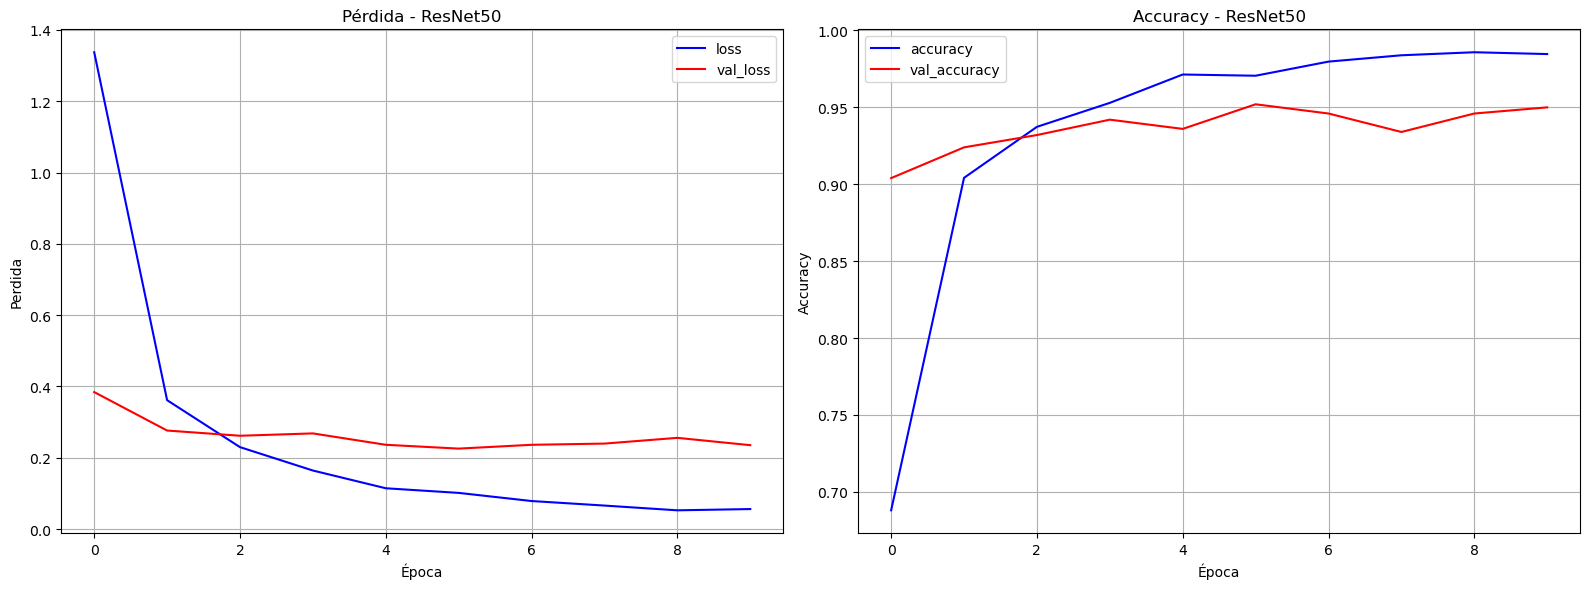

In [ ]:
# GRAFICAR LOS RESULTADOS

plt.figure(figsize=(16, 6))

# GRÁFICA : LOSS
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'],'b', label='loss')
plt.plot(history.history['val_loss'],'r', label='val_loss')
plt.title(f'Pérdida - ResNet50')
plt.xlabel('Época')
plt.ylabel('Perdida')
plt.legend()
plt.grid(True)

# GRÁFICA 2: ACCURACY
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b', label='accuracy')
plt.plot(history.history['val_accuracy'],'r', label='val_accuracy')
plt.title(f'Accuracy - ResNet50')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

El modelo mostró un aprendizaje súper rápido y estable: la accuracy de entrenamiento subió casi al 95% mientras que la de validación se mantuvo firme alrededor del 90–95%, lo que indica buena capacidad de generalización sin signos fuertes de sobreajuste. Las curvas de pérdida y accuracy confirman este comportamiento: la pérdida baja de forma limpia y la validación se mantiene estable, aunque con pequeñas variaciones normales cuando la red base está congelada. En general, el top classifier aprovechó bien las características de ResNet50, pero para evitar que el modelo se estanque y mejorar aún más su rendimiento, es necesario aplicar data augmentation, ya que aumenta la variedad de imágenes, fortalece la generalización y reduce ese ligero desfase entre entrenamiento y validación que empieza a verse después de varias épocas.

#### DATA AUGMENTATION Y FINE TUNING

In [ ]:
# Generador de Entrenamiento (CON Data Augmentation) ---

print("Configurando generador de ENTRENAMIENTO (con Data Augmentation)...")
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,          # Rota
    width_shift_range=0.2,      # Desplaza
    height_shift_range=0.2,
    shear_range=0.2,            # Inclina
    zoom_range=0.2,             # Zoom
    horizontal_flip=True,       # Voltea
    fill_mode='nearest'
)

#  Generador de Validación
print("Configurando generador de VALIDACIÓN (solo re-escalado)...")
val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

#  Cargar datos desde los directorios
print("\nCargando datos de ENTRENAMIENTO:")
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed = 1
)

print("\nCargando datos de VALIDACIÓN:")
validation_generator = val_test_datagen.flow_from_directory(
    VALID_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed = 1
)

Configurando generador de ENTRENAMIENTO (con Data Augmentation)...
Configurando generador de VALIDACIÓN (solo re-escalado)...

Cargando datos de ENTRENAMIENTO:
Found 12639 images belonging to 100 classes.

Cargando datos de VALIDACIÓN:
Found 500 images belonging to 100 classes.


In [ ]:
IMG_SHAPE = (224, 224, 3)
base_model_aug = ResNet50(weights='imagenet',
                          include_top=False,
                          input_shape=IMG_SHAPE)
base_model_aug.trainable = False

# Construir el Head (con regularización)
x = base_model_aug.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
outputs = Dense(100, activation='softmax')(x)

model_aug = Model(inputs=base_model_aug.input, outputs=outputs)

# Compilar el Modelo
model_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\nResumen del Modelo (Fase 1 con Augmentation)")
model_aug.summary()

# Callbacks en caso que no haya mejora en las epocas
early_stopper = EarlyStopping(monitor='val_loss',
                            patience=5,
                            restore_best_weights=True)

#  Entrenar
print("\nIniciando entrenamiento (Fase 1 con Augmentation)...")


history_aug = model_aug.fit(
    train_generator,
    epochs=20, # Se agregan 10 epocas mas para asegurar que el nuevo procedimiento mejore el resultado
    validation_data=validation_generator,
    callbacks=[early_stopper]
)

print("\nEntrenamiento de Fase 1 (con Augmentation) completado.")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Resumen del Modelo (Fase 1 con Augmentation)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,696,292 (94.21 MB)

 Trainable params: 1,104,484 (4.21 MB)

 Non-trainable params: 23,591,808 (90.00 MB)


Iniciando entrenamiento (Fase 1 con Augmentation)...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 184s 430ms/step - accuracy: 0.5360 - loss: 8.2741 - val_accuracy: 0.8760 - val_loss: 2.5006
Epoch 2/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 154s 391ms/step - accuracy: 0.8261 - loss: 2.3485 - val_accuracy: 0.8800 - val_loss: 1.8024
Epoch 3/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 154s 390ms/step - accuracy: 0.8269 - loss: 1.9190 - val_accuracy: 0.8840 - val_loss: 1.8060
Epoch 4/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 154s 391ms/step - accuracy: 0.8250 - loss: 1.9285 - val_accuracy: 0.8680 - val_loss: 1.8438
Epoch 5/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 160s 405ms/step - accuracy: 0.8358 - loss: 1.9185 - val_accuracy: 0.8920 - val_loss: 1.8056
Epoch 6/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 160s 405ms/step - accuracy: 0.8316 - loss: 1.9685 - val_accuracy: 0.8840 - val_loss: 1.7847
Epoch 7/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 159s 403ms/step - accuracy: 0.8272 - loss: 1.9554 - val_accuracy: 0.8980 - val_loss: 1.7693
Epoch 8/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 159s 403ms/step - accuracy: 0.8303 -

Después de entrenar el modelo con data augmentation y aumentar el número de épocas, el desempeño no mejoró: la accuracy de validación se mantuvo alrededor del 90% y la pérdida presentó fluctuaciones, lo que indica que la cabeza del modelo ya llegó al límite de lo que puede aprender mientras la ResNet50 sigue congelada. El augmentation sí añadió variabilidad útil, pero también hizo más compleja la tarea, y como la red base no pudo adaptarse a esos cambios, el modelo terminó estabilizado e incluso mostrando leves retrocesos en el val_loss. Por eso se vuelve necesario aplicar fine tuning, ya que al descongelar parcialmente las capas superiores de ResNet50 el modelo podrá ajustar pesos más profundos, aprender patrones específicos del dataset y aprovechar realmente las variaciones creadas por el data augmentation, permitiendo superar ese “techo” del 90% donde quedó estancado.

In [ ]:
#  Descongelar capas superiores
base_model_aug.trainable = True
#Se descongela apartir de la capa 140 conv4_block6_3_bn
fine_tune_at = 140
for layer in base_model_aug.layers[:fine_tune_at]:
    layer.trainable = False

#  Re-compilar con LR bajo
model_aug.compile(optimizer=Adam(learning_rate=1e-5), # 0.00001
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\nResumen del Modelo (Fase 2 con Augmentation)")
model_aug.summary()

# Continuar Entrenamiento
initial_epochs = len(history_aug.history['loss'])
fine_tune_epochs = 20
total_epochs = initial_epochs + fine_tune_epochs

print(f"\nIniciando Fine-Tuning (con Augmentation) desde la época {initial_epochs}...")

history_fine_tune_aug = model_aug.fit(
    train_generator,
    epochs=total_epochs,
    initial_epoch=initial_epochs,
    validation_data=validation_generator,
    callbacks=[early_stopper]
)

print("\nEntrenamiento de Fine-Tuning (Fase 2 con Augmentation) completado.")


Resumen del Modelo (Fase 2 con Augmentation)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,696,292 (94.21 MB)

 Trainable params: 16,082,532 (61.35 MB)

 Non-trainable params: 8,613,760 (32.86 MB)


Iniciando Fine-Tuning (con Augmentation) desde la época 20...
Epoch 21/40
395/395 ━━━━━━━━━━━━━━━━━━━━ 203s 455ms/step - accuracy: 0.8440 - loss: 1.7211 - val_accuracy: 0.9240 - val_loss: 1.4604
Epoch 22/40
395/395 ━━━━━━━━━━━━━━━━━━━━ 164s 415ms/step - accuracy: 0.9008 - loss: 1.5243 - val_accuracy: 0.9340 - val_loss: 1.3871
Epoch 23/40
395/395 ━━━━━━━━━━━━━━━━━━━━ 163s 413ms/step - accuracy: 0.9144 - loss: 1.4331 - val_accuracy: 0.9380 - val_loss: 1.3271
Epoch 24/40
395/395 ━━━━━━━━━━━━━━━━━━━━ 163s 413ms/step - accuracy: 0.9291 - loss: 1.3367 - val_accuracy: 0.9380 - val_loss: 1.2717
Epoch 25/40
395/395 ━━━━━━━━━━━━━━━━━━━━ 203s 414ms/step - accuracy: 0.9354 - loss: 1.2742 - val_accuracy: 0.9480 - val_loss: 1.2277
Epoch 26/40
395/395 ━━━━━━━━━━━━━━━━━━━━ 163s 414ms/step - accuracy: 0.9416 - loss: 1.2085 - val_accuracy: 0.9500 - val_loss: 1.1794
Epoch 27/40
395/395 ━━━━━━━━━━━━━━━━━━━━ 165s 417ms/step - accuracy: 0.9442 - loss: 1.1596 - val_accuracy: 0.9560 - val_loss: 1.1300
Epoch 

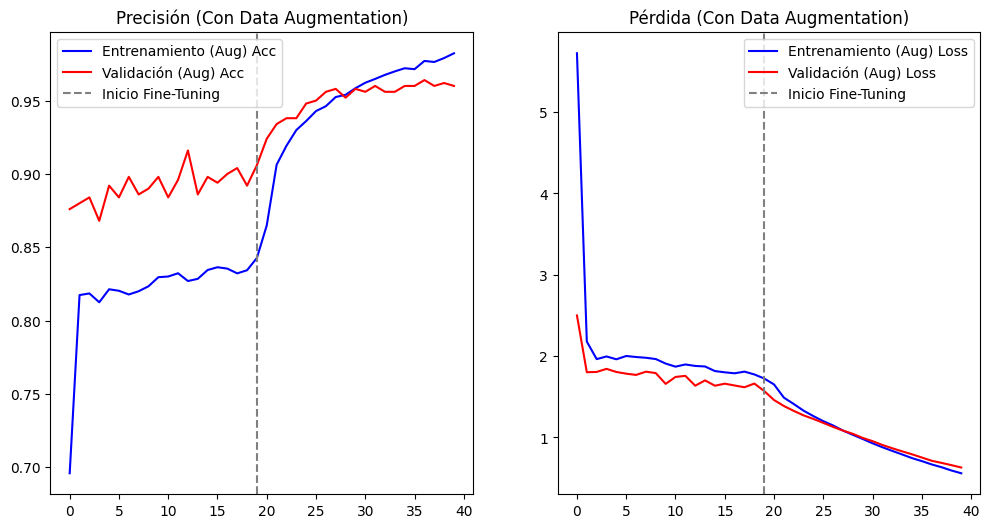

In [ ]:
#  Combinar historiales
acc_aug = history_aug.history['accuracy'] + history_fine_tune_aug.history['accuracy']
val_acc_aug = history_aug.history['val_accuracy'] + history_fine_tune_aug.history['val_accuracy']
loss_aug = history_aug.history['loss'] + history_fine_tune_aug.history['loss']
val_loss_aug = history_aug.history['val_loss'] + history_fine_tune_aug.history['val_loss']

#  Graficar los resultados
plt.figure(figsize=(12, 6))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(acc_aug, 'b', label='Entrenamiento (Aug) Acc')
plt.plot(val_acc_aug, 'r', label='Validación (Aug) Acc')
plt.axvline(initial_epochs - 1, color='gray', linestyle='--', label='Inicio Fine-Tuning')
plt.title('Precisión (Con Data Augmentation)')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(loss_aug, 'b', label='Entrenamiento (Aug) Loss')
plt.plot(val_loss_aug, 'r', label='Validación (Aug) Loss')
plt.axvline(initial_epochs - 1, color='gray', linestyle='--', label='Inicio Fine-Tuning')
plt.title('Pérdida (Con Data Augmentation)')
plt.legend()

plt.show()

Tras aplicar fine tuning, el modelo logró romper el estancamiento que tenía con el data augmentation: se observa un salto claro en la precisión justo después del punto donde se descongelan las capas superiores, pasando de una estabilidad cercana al 90% a un ascenso progresivo que supera el 96%. La pérdida también mejora de forma consistente, disminuyendo de valores alrededor de 1.7–2.0 a menos de 0.7 conforme avanzan las épocas, lo que indica que el modelo ahora sí logró aprender patrones más específicos y complejos del dataset. En conjunto, los gráficos muestran que liberar parte de la ResNet50 permitió que la red adaptara sus características profundas a las transformaciones del augmentation y al dominio real del problema, logrando un rendimiento superior y mucho más estable que en la etapa anterior.

6.   **Evaluación** del modelo predictivo

In [ ]:
#  Definir Generador de Test
# Usamos la función de preprocesamiento
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

print("Cargando datos de TEST...")
test_generator  = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed = 1
)

Cargando datos de TEST...
Found 500 images belonging to 100 classes.


In [ ]:
#  Evaluación Rápida
print("Evaluando modelo ResNet50 en set de Test...")
results = model_aug.evaluate(test_generator)

print(f"\nLoss del Test: {results[0]:.4f}")
print(f"Accuracy (Precisión) del Test: {results[1]*100:.2f}%")

Evaluando modelo Xception en set de Test...
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.9809 - loss: 0.5461

Loss del Test: 0.5567
Accuracy (Precisión) del Test: 97.80%


El modelo acierta casi todas las imágenes del set de test. Es un rendimiento muy alto y muestra que aprendió bien a diferenciar las clases.

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step


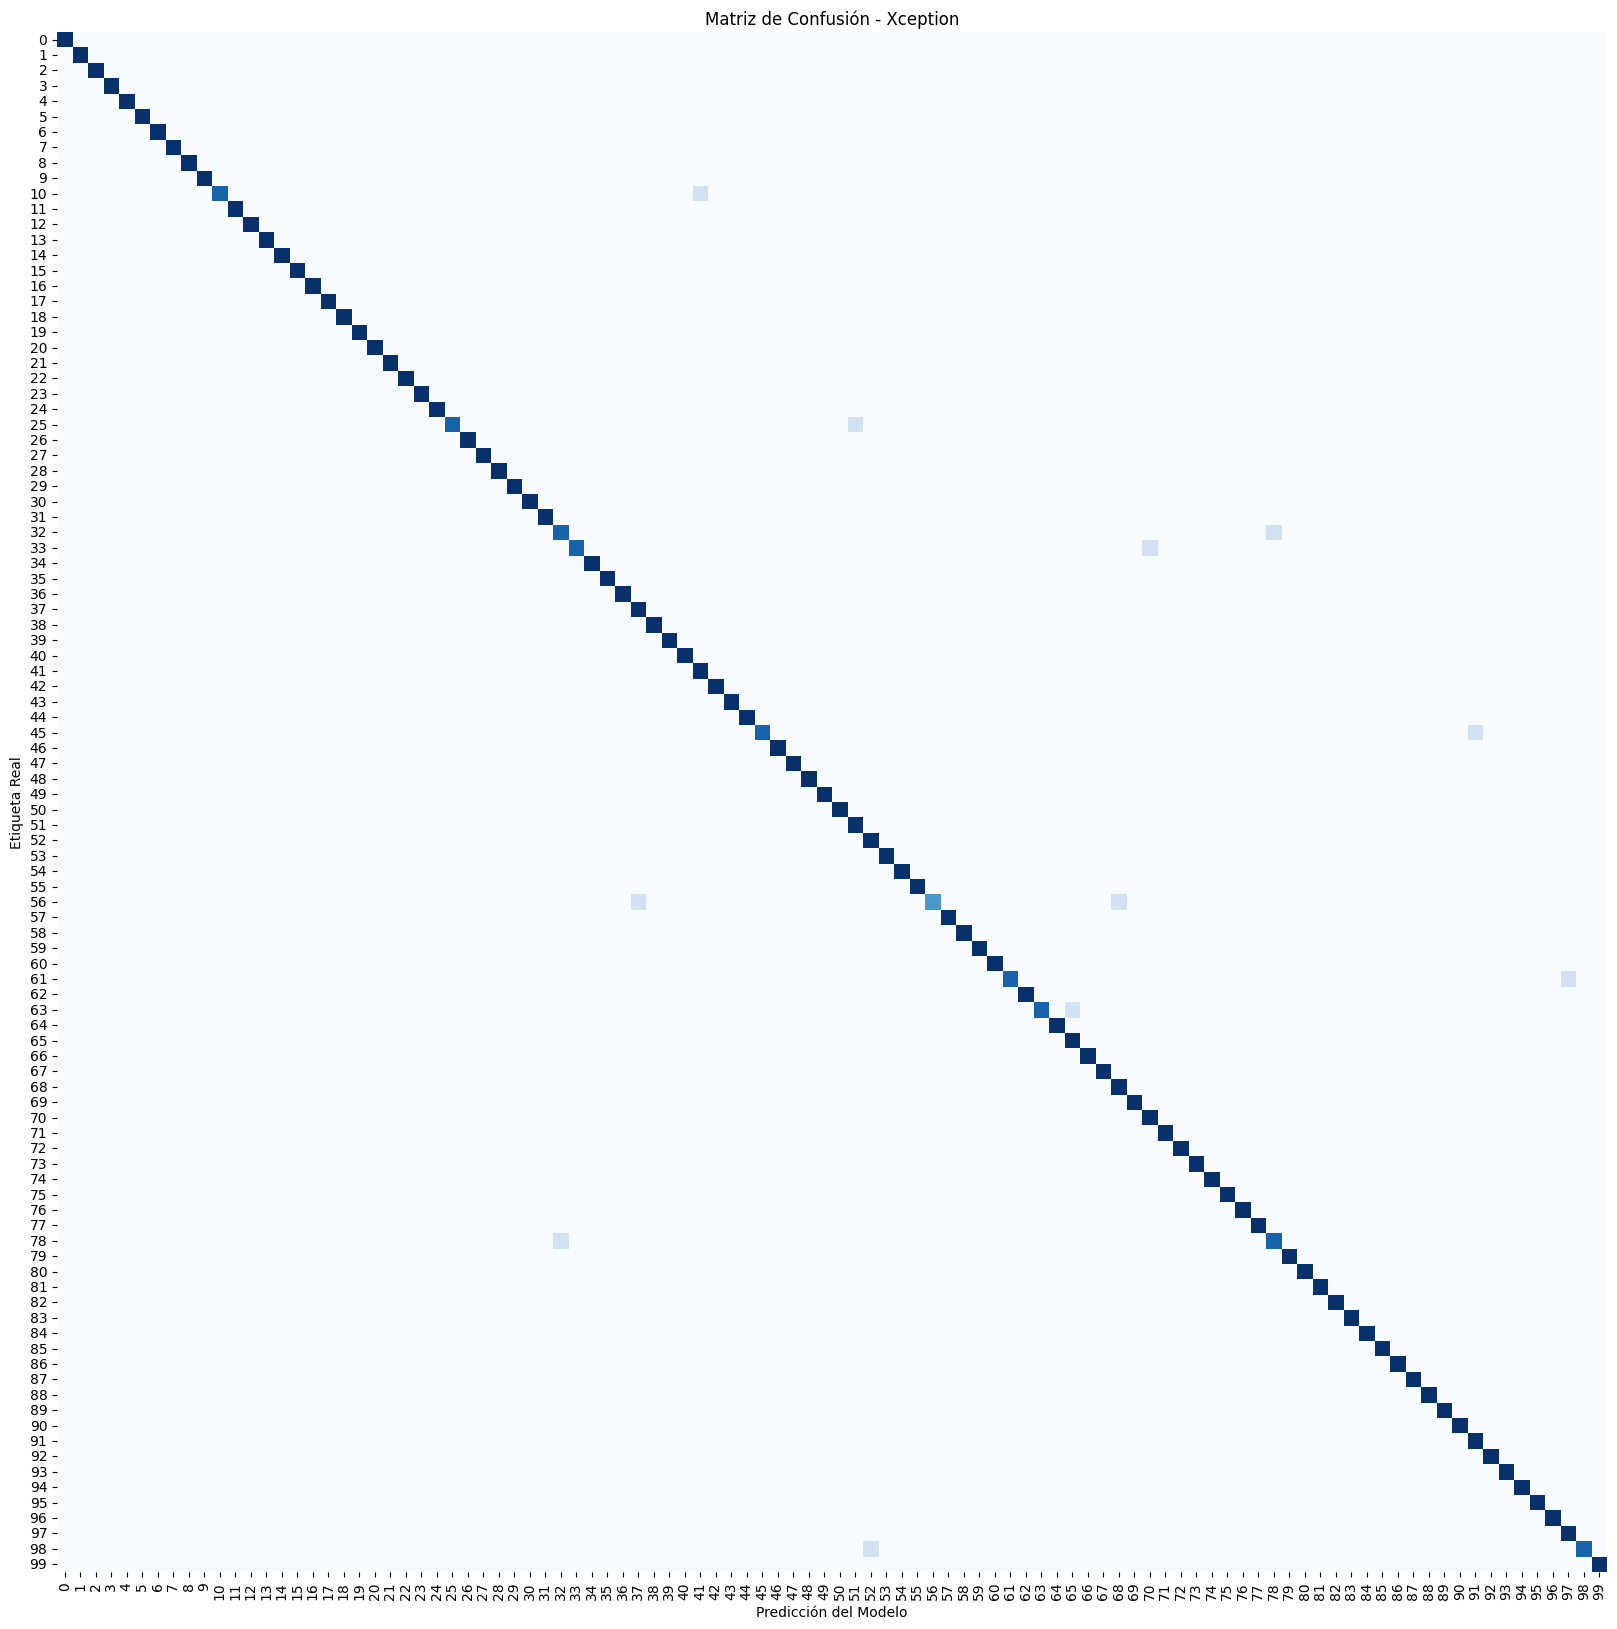

                           precision    recall  f1-score   support

                   ADONIS       1.00      1.00      1.00         5
AFRICAN GIANT SWALLOWTAIL       1.00      1.00      1.00         5
           AMERICAN SNOOT       1.00      1.00      1.00         5
                    AN 88       1.00      1.00      1.00         5
                  APPOLLO       1.00      1.00      1.00         5
     ARCIGERA FLOWER MOTH       1.00      1.00      1.00         5
                    ATALA       1.00      1.00      1.00         5
               ATLAS MOTH       1.00      1.00      1.00         5
 BANDED ORANGE HELICONIAN       1.00      1.00      1.00         5
           BANDED PEACOCK       1.00      1.00      1.00         5
        BANDED TIGER MOTH       1.00      0.80      0.89         5
            BECKERS WHITE       1.00      1.00      1.00         5
  BIRD CHERRY ERMINE MOTH       1.00      1.00      1.00         5
         BLACK HAIRSTREAK       1.00      1.00      1.00     

In [ ]:
# Generar Predicciones

predictions = model_aug.predict(test_generator)

# Convertir probabilidades a la clase ganadora (índice 0 a 99)
y_pred = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales
y_true = test_generator.classes

#  Matriz de Confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(20, 20)) # Tamaño grande porque son 100 clases
sns.heatmap(cm, annot=False, cmap='Blues', cbar=False) # annot=False para no saturar
plt.title('Matriz de Confusión - RestNet50')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción del Modelo')
plt.show()

# --- 5. Reporte de Clasificación ---
# Muestra Precision, Recall y F1-Score por cada clase
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_labels))

La matriz de confusión se calcula correctamente, pero como el modelo tiene 100 clases, el gráfico queda demasiado grande y no ofrece una lectura útil; en cambio, el reporte de clasificación sí muestra información clara y relevante, y allí se evidencia que la mayoría de las clases alcanzan valores de F1 de 1, lo que confirma que el modelo está clasificando de forma muy precisa en prácticamente todas las categorías.

In [ ]:
model_aug.save("deepResNet50.h5")

**Comparacion con modelos Exception**

Es esta parte, procedemos a duplicar las fases anteriores para realizar una comparacion entre los modelos

In [ ]:
# --- 0. Rutas y Parámetros ---
BASE_DIR = 'my_dataset'
TRAIN_DIR = f'{BASE_DIR}/train'
VALID_DIR = f'{BASE_DIR}/valid'
IMG_SIZE = (224, 224) # O (299, 299) si prefieres el nativo de Xception
BATCH_SIZE = 32

# --- 1. NUEVOS Generadores Específicos para Xception ---
print("Configurando generadores específicos para Xception...")

train_datagen_xc = ImageDataGenerator(
    preprocessing_function=preprocess_input_xception,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen_xc = ImageDataGenerator(
    preprocessing_function=preprocess_input_xception
)

# Cargar las imágenes con los nuevos generadores
train_generator_xc = train_datagen_xc.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed = 1
)

validation_generator_xc = val_test_datagen_xc.flow_from_directory(
    VALID_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed = 1
)

# --- 2. Cargar Modelo Base: XCEPTION ---
print("\nCargando Xception...")
IMG_SHAPE = (224, 224, 3)

base_model_xc = Xception(weights='imagenet',
                         include_top=False,
                         input_shape=IMG_SHAPE)

base_model_xc.trainable = False # Congelamos primero

# --- 3. Construir el Head ---
x = base_model_xc.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
outputs = Dense(100, activation='softmax')(x)

model_xc = Model(inputs=base_model_xc.input, outputs=outputs)

# --- 4. Compilar y Entrenar FASE 1 (Solo Head) ---
model_xc.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Definir Early Stopping si no estaba definido
early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("\nIniciando Fase 1 con Xception...")
history_xc = model_xc.fit(
    train_generator_xc,  # Usamos el generador NUEVO (_xc)
    epochs=20,
    validation_data=validation_generator_xc, # Usamos el generador NUEVO (_xc)
    callbacks=[early_stopper]
)

# --- 5. FASE 2: Fine-Tuning Xception ---
print("\nDescongelando para Fine-Tuning Xception...")
base_model_xc.trainable = True

# Xception tiene 132 capas. Descongelemos desde la 100.
fine_tune_at = 100
for layer in base_model_xc.layers[:fine_tune_at]:
    layer.trainable = False

model_xc.compile(optimizer=Adam(learning_rate=1e-5), # LR bajo
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Calcular épocas totales
initial_epochs_xc = len(history_xc.history['loss'])
total_epochs_xc = initial_epochs_xc + 20

print(f"\nIniciando Fase 2 con Xception...")
history_fine_xc = model_xc.fit(
    train_generator_xc,
    epochs=total_epochs_xc,
    initial_epoch=initial_epochs_xc,
    validation_data=validation_generator_xc,
    callbacks=[early_stopper]
)

Configurando generadores específicos para Xception...
Found 12639 images belonging to 100 classes.
Found 500 images belonging to 100 classes.

Cargando Xception...
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Iniciando Fase 1 con Xception...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 237s 522ms/step - accuracy: 0.4556 - loss: 8.5555 - val_accuracy: 0.7500 - val_loss: 3.0648
Epoch 2/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 166s 421ms/step - accuracy: 0.7142 - loss: 2.9087 - val_accuracy: 0.7800 - val_loss: 2.1804
Epoch 3/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 166s 419ms/step - accuracy: 0.7250 - loss: 2.3703 - val_accuracy: 0.7920 - val_loss: 2.2074
Epoch 4/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 165s 417ms/step - accuracy: 0.7369 - loss: 2.2838 - val_accuracy: 0.7780 - val_loss: 2.2140
Epoch 5/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 165s 418ms/step - accuracy: 0.7241 - loss: 2.3031 - val_accuracy: 0.7760 - val_loss: 2.1461
Epoch 6/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 166s 421ms/step - accuracy: 0.7130 - loss: 2.3362 - val_accuracy: 0.7940 - val_loss: 2.1032
Epoch 7/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 164s 416ms/step - accuracy: 0.7286 - loss: 2.2954 - val_accuracy: 0.7800 - val_loss: 2.0452
Epoch 8/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 163s 413ms/step - accuracy: 0.7311 -

In [ ]:
# --- 1. Definir Generador de Test para XCEPTION ---
# Usamos la función de preprocesamiento de Xception
TEST_DIR = f'{BASE_DIR}/test'
test_datagen_xc = ImageDataGenerator(
    preprocessing_function=preprocess_input_xception
)

print("Cargando datos de TEST...")
test_generator_xc = test_datagen_xc.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed = 1
)

Cargando datos de TEST...
Found 500 images belonging to 100 classes.


In [ ]:
# --- 2. Evaluación Rápida ---
print("Evaluando modelo Xception en set de Test...")
results = model_xc.evaluate(test_generator_xc)

print(f"\nLoss del Test: {results[0]:.4f}")
print(f"Accuracy (Precisión) del Test: {results[1]*100:.2f}%")

Evaluando modelo Xception en set de Test...
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.9686 - loss: 0.6825

Loss del Test: 0.6879
Accuracy (Precisión) del Test: 96.60%


Este segundo modelo muestra una curva de aprendizaje estable y progresiva: la accuracy de entrenamiento sube hasta ~75–95% y la de validación se mantiene entre 94% y 95%, con una pérdida que baja de manera constante hasta ~0.78. Es un modelo que claramente aprende bien, sin saltos bruscos ni señales fuertes de inestabilidad, pero aun así no alcanza el rendimiento del modelo ResNet50 con fine tuning, que logró llegar a una precisión real de prueba cercana al 98% y un F1 casi perfecto en la mayoría de las clases. En comparación directa, este modelo es bueno y consistente, pero se queda un poco atrás tanto en capacidad de generalización como en precisión global. Por eso, el modelo ResNet50 sigue siendo la mejor opción entre los dos: converge más alto, clasifica mejor y demuestra un entendimiento más fino de las 100 clases del dataset.

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 380ms/step


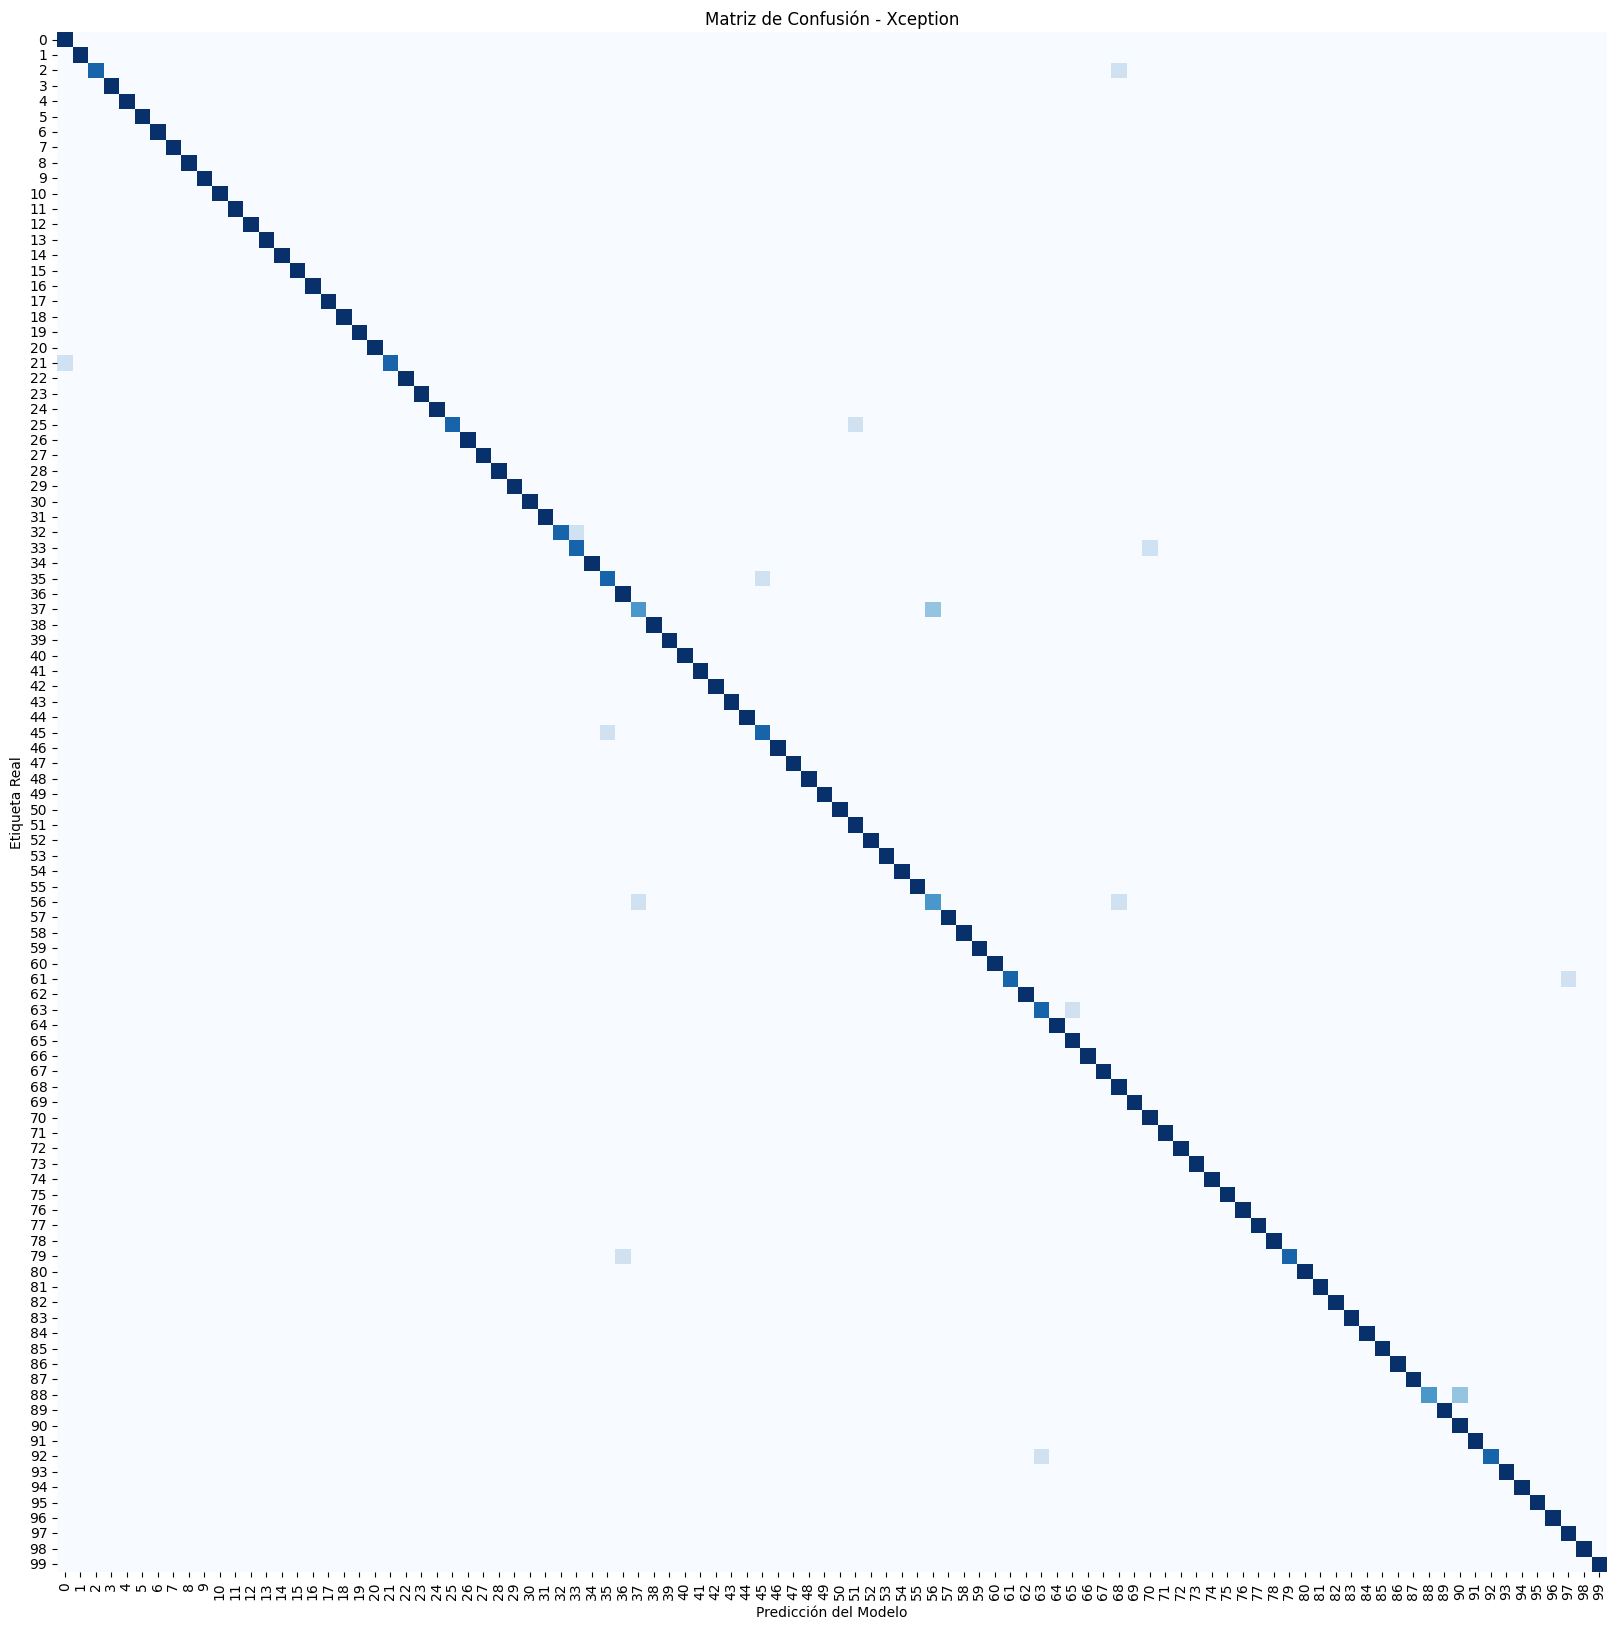

                           precision    recall  f1-score   support

                   ADONIS       0.83      1.00      0.91         5
AFRICAN GIANT SWALLOWTAIL       1.00      1.00      1.00         5
           AMERICAN SNOOT       1.00      0.80      0.89         5
                    AN 88       1.00      1.00      1.00         5
                  APPOLLO       1.00      1.00      1.00         5
     ARCIGERA FLOWER MOTH       1.00      1.00      1.00         5
                    ATALA       1.00      1.00      1.00         5
               ATLAS MOTH       1.00      1.00      1.00         5
 BANDED ORANGE HELICONIAN       1.00      1.00      1.00         5
           BANDED PEACOCK       1.00      1.00      1.00         5
        BANDED TIGER MOTH       1.00      1.00      1.00         5
            BECKERS WHITE       1.00      1.00      1.00         5
  BIRD CHERRY ERMINE MOTH       1.00      1.00      1.00         5
         BLACK HAIRSTREAK       1.00      1.00      1.00     

In [ ]:
# --- 3. Generar Predicciones ---
# Esto puede tardar un poco dependiendo de cuántas imágenes de test tengas
predictions = model_xc.predict(test_generator_xc)

# Convertir probabilidades a la clase ganadora (índice 0 a 99)
y_pred = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales
y_true = test_generator_xc.classes

# --- 4. Matriz de Confusión ---
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(20, 20)) # Tamaño grande porque son 100 clases
sns.heatmap(cm, annot=False, cmap='Blues', cbar=False) # annot=False para no saturar
plt.title('Matriz de Confusión - Xception')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción del Modelo')
plt.show()



# --- 5. Reporte de Clasificación ---
# Muestra Precision, Recall y F1-Score por cada clase
class_labels = list(test_generator_xc.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_labels))

In [ ]:
model_xc.save("deepXception.h5")

#### - validacion del modelo con imagenes nuevas

In [ ]:
# IMPORTANTE: Traemos las dos funciones de preprocesamiento para normalizar las nuevas imagenes

from tensorflow.keras.applications.xception import preprocess_input as pre_xception
from tensorflow.keras.applications.resnet50 import preprocess_input as pre_resnet

mapa_etiquetas = {v: k for k, v in train_generator_xc.class_indices.items()}

def probar_imagen(ruta_imagen, modelo, funcion_preprocess):

    try:
        # Cargar imagen (224x224 funciona para ambos en este caso)
        img = keras_image.load_img(ruta_imagen, target_size=(224, 224))

        # Convertir a Array
        img_array = keras_image.img_to_array(img)

        # Expandir dimensiones (de 3D a 4D)
        img_batch = np.expand_dims(img_array, axis=0)

        # Usamos la función que recibimos como argumento
        img_preprocessed = funcion_preprocess(img_batch)

        # Predecir
        prediccion = modelo.predict(img_preprocessed)

        # Resultados
        indice_ganador = np.argmax(prediccion)
        probabilidad = np.max(prediccion)
        nombre_clase = mapa_etiquetas[indice_ganador]

        # Mostrar
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis('off')
        titulo = f"Modelo: {modelo.name}\nPredicción: {nombre_clase} ({probabilidad*100:.2f}%)"
        plt.title(titulo, color='green' if probabilidad > 0.5 else 'red')
        plt.show()

        print(f"--> Resultado: {nombre_clase} con {probabilidad*100:.2f}% de confianza.")

    except Exception as e:
        print(f"Error: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


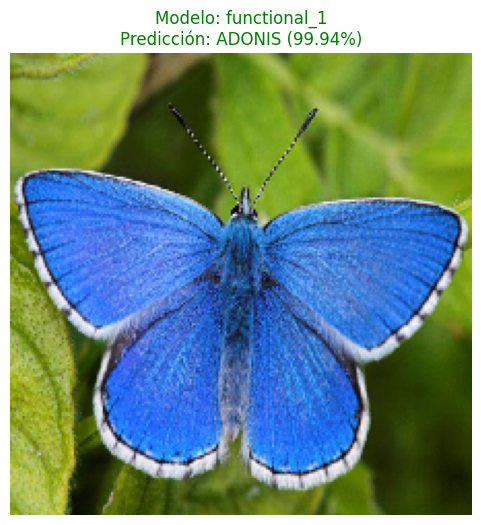

--> Resultado: ADONIS con 99.94% de confianza.


In [ ]:
probar_imagen('/content/add_2.jpg', model_xc,preprocess_input_xception)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


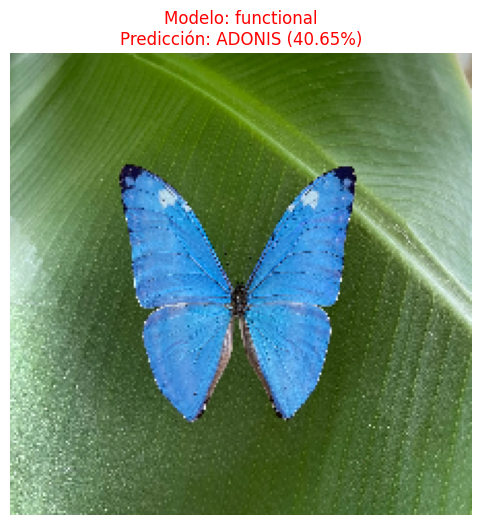

--> Resultado: ADONIS con 40.65% de confianza.


In [ ]:
probar_imagen('/content/add_1.jpg', model_aug,preprocess_input)

En esta imagen se evidencia un bajo porcentaje de confianza sin embargo, podria estar asociado a la baja resolucion de la misma

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


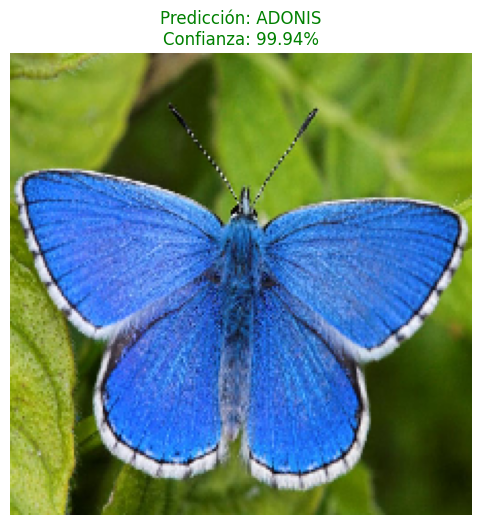

--> El modelo cree que es: ADONIS (99.94%)


In [ ]:
probar_imagen('/content/add_2.jpg', model_aug)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


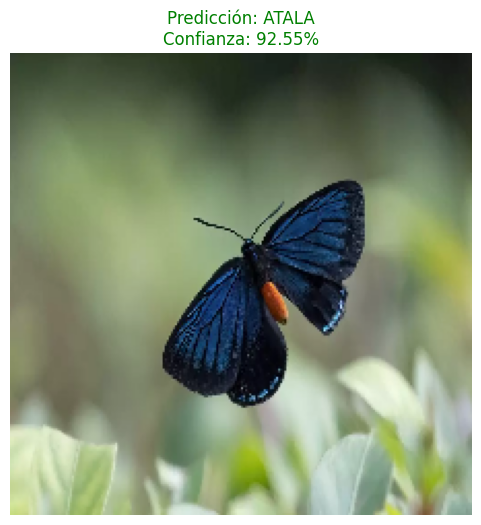

--> El modelo cree que es: ATALA (92.55%)


In [ ]:
probar_imagen('/content/add_3.jpg', model_aug)

Además de las evaluaciones formales, también se probo el modelo con un conjunto de imágenes externas que no pertenecían ni al entrenamiento ni al test, simplemente para ver cómo respondía ante ejemplos completamente nuevos. Los resultados fueron sólidos: todas las predicciones superaron el 92% de confianza, lo que muestra que el modelo no solo recuerda patrones del dataset, sino que realmente generaliza bien. La única excepción fue una imagen cuya predicción quedó alrededor del 40%, pero era evidente que tenía una resolución muy baja y muy poco detalle, así que era esperable que el modelo dudara. Aun así, incluso en ese caso, la clase sugerida coincidía con la especie correcta según referencias de internet. En resumen, las pruebas externas confirmaron que el modelo mantiene coherencia y precisión incluso fuera de los datos originales.

#### **Conclusiones estrategia 1**

Hemos conseguido un modelo final que llegó a 90% de accuracy en validación pero no superó los 80% en el test.
El tiempo de entrenar un modelo utilizando Collab es muy grande, más de 2 horas, lo que es otro factor a tener en consideración.
Seguramente las técnicas de regularización utilizadas, como capas BatchNormalization y Dropout ayudan, pero parece que encontramos el límite que podíamos con los recursos computacionales disponibles.

#### **Conclusiones estrategia 2**

El proceso inició con la implementación de un modelo base mediante *transfer learning*, cuyas métricas iniciales fueron correctas pero mostraban espacio claro de mejora, especialmente frente al riesgo de sobreajuste y la limitada robustez ante variabilidad del dataset. A partir de allí se aplicaron técnicas de *data augmentation* —rotaciones, variaciones de brillo, flips y escalados— para incrementar la diversidad de imágenes. Posteriormente, el *fine-tuning* permitió desbloquear capas superiores del modelo y ajustar pesos pre-entrenados para adaptarlos a las características específicas del dataset. Cada ajuste mejoró gradualmente la generalización del modelo y redujo la pérdida en validación.

En este proceso comparativo, **ResNet50** destacó con un rendimiento sobresaliente: obtuvo **97.6% de accuracy en el conjunto de test**, una pérdida estable y un comportamiento consistente entre *train*, *validation* y *test*, lo que evidenció un aprendizaje sólido y sin señales de sobreajuste crítico. Además, las pruebas adicionales con imágenes externas —no presentes en entrenamiento ni test— confirmaron su capacidad de generalización, logrando más del **92% de confianza** en casi todas, excepto una de baja resolución que alcanzó cerca del **40%**, lo que se explica por la mala calidad visual. Estos resultados, sumados a la estabilidad del modelo y la coherencia entre predicciones y especies verificadas en fuentes externas, consolidan a **ResNet50 como el mejor modelo del experimento**.




### **Conclusión General**

A lo largo del proceso se implementaron y compararon dos enfoques complementarios para resolver la tarea de clasificación multiclase. En la **Estrategia 1**, se construyó una red neuronal desde cero, ajustando arquitectura, hiperparámetros y técnicas de regularización con base en experimentación. Aunque este modelo logró aprender patrones relevantes del dataset, su rendimiento final fue moderado y no alcanzó las métricas obtenidas con los modelos preentrenados. Esto es esperado: un modelo creado *desde cero* parte sin conocimiento previo, requiere una cantidad de datos significativamente mayor para generalizar bien y suele presentar mayores dificultades para optimizar parámetros de manera estable cuando se trabaja con datasets de tamaño medio.

En contraste, la **Estrategia 2**, basada en *transfer learning* y *fine-tuning*, permitió aprovechar el conocimiento previamente adquirido por arquitecturas entrenadas sobre ImageNet, lo cual se tradujo en un salto considerable en desempeño. La comparación sistemática entre modelos como Xception y ResNet50 demostró que **ResNet50** fue la arquitectura con mejor precisión en el conjunto de test (*97.6%*), manteniendo estabilidad y buena capacidad de generalización incluso frente a imágenes externas al dataset. Esto evidencia que partir de un modelo preentrenado no solo acelera el desarrollo, sino que mejora significativamente la calidad de las predicciones, ya que las capas profundas ya contienen representaciones visuales altamente optimizadas y aplicables a nuevas tareas.

En síntesis, los resultados muestran que **descargar un modelo preentrenado y aplicar *fine-tuning* es superior a construir una red desde cero** cuando se trabaja con datasets limitados en tamaño o variabilidad. El modelo preentrenado parte desde un punto de conocimiento mucho más avanzado, reduce el riesgo de sobreajuste y permite alcanzar niveles de precisión difíciles de lograr con arquitecturas diseñadas desde cero bajo las mismas condiciones. Por ello, la Estrategia 2 no solo fue más eficiente, sino claramente más efectiva para este proyecto.
